In [ ]:
!nvidia-smi

Sat Dec 16 09:40:59 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


# Install YOLOv8

In [ ]:
!Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.2/78.2 GB disk)


In [ ]:
#Git clone method (for development)

%cd {HOME}
!git clone github.com/ultralytics/ultralytics
%cd {HOME}/ultralytics
!pip install -e .

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

# CLI Basics

"CLI Basics" обозначает основы командной строки (Command Line Interface, CLI). Командная строка предоставляет текстовый интерфейс для взаимодействия с операционной системой или программой. В CLI пользователь вводит команды текстом, и операционная система выполняет соответствующие действия.

yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...

# CLI

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='/content/1_result.png' save=True
# https://media.roboflow.com/notebooks/examples/dog.jpeg

/content
100% 6.23M/6.23M [00:00<00:00, 181MB/s]

2023-12-16 09:48:45.939156: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-16 09:48:45.939215: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-16 09:48:45.940731: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-16 09:48:46.992018: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
WARNING ⚠️ NMS time lim

/content


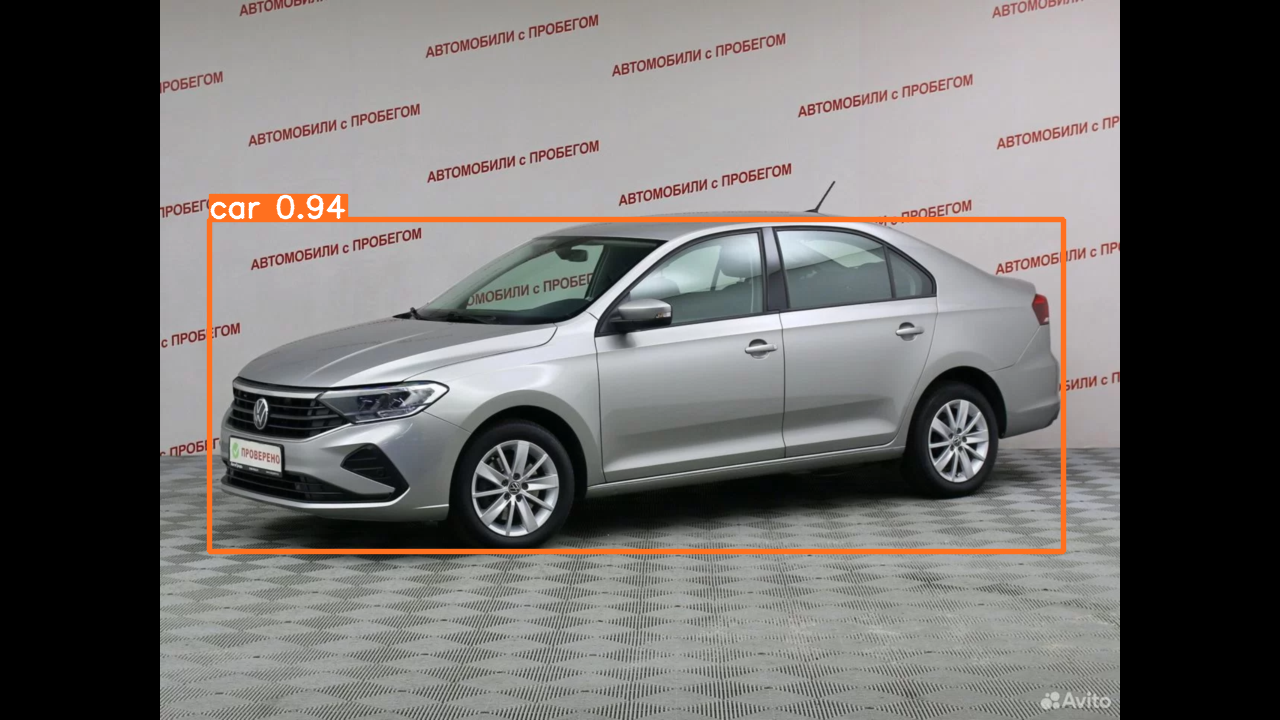

In [ ]:
%cd {HOME}
Image(filename='/content/runs/detect/predict/1_result.png', height=600)

# Python SDK

Python SDK" обозначает "Software Development Kit" (набор средств разработки программного обеспечения) для Python. Это коллекция библиотек, инструментов и ресурсов, предназначенных для облегчения разработки программного обеспечения на языке программирования Python.

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='/content/1_result.png', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded


In [ ]:
results[0].boxes.xyxy

tensor([[ 209.,  219., 1063.,  551.]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.93870], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([2.], device='cuda:0')

# Roboflow Universe

In [ ]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="ddJX0UP9G8sFYbMJboCM")
# project = rf.workspace("abdalla-shuqair-a6pml").project("car-parts-segmentation-l4dqz")
# dataset = project.version(2).download("yolov5")


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet
!pip install ultralytics==8.0.196
# !pip install roboflow


# !pip install roboflow
# from roboflow import Roboflow
# rf = Roboflow(api_key="ddJX0UP9G8sFYbMJboCM")
# project = rf.workspace("abdalla-shuqair-a6pml").project("car-parts-segmentation-l4dqz")
# dataset = project.version(2).download("yolov5")


from roboflow import Roboflow
rf = Roboflow(api_key="ddJX0UP9G8sFYbMJboCM")
project = rf.workspace("abdalla-shuqair-a6pml").project("car-parts-segmentation-l4dqz")
dataset = project.version(2).download("yolov8")



# !pip install roboflow
# from roboflow import Roboflow
# rf = Roboflow(api_key="ddJX0UP9G8sFYbMJboCM")
# project = rf.workspace("abdalla-shuqair-a6pml").project("car-parts-segmentation-l4dqz")
# dataset = project.version(2).download("yolov7")


mkdir: cannot create directory ‘{HOME}/datasets’: No such file or directory
[Errno 2] No such file or directory: '{HOME}/datasets'
/content
loading Roboflow workspace...
loading Roboflow project...


WARNING ⚠️ Ultralytics settings reset to default values. This may be due to a possible problem with your settings or a recent ultralytics package update. 
View settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.yaml'
Update settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'.


Extracting Dataset Version Zip to Car-Parts-Segmentation-2 in yolov8:: 100%|██████████| 86/86 [00:00<00:00, 3247.01it/s]


# Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

[Errno 2] No such file or directory: '{HOME}'
/content
100% 21.5M/21.5M [00:00<00:00, 233MB/s]
New https://pypi.org/project/ultralytics/8.0.227 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Car-Parts-Segmentation-2/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_lab

In [ ]:
import matplotlib.pyplot as plt

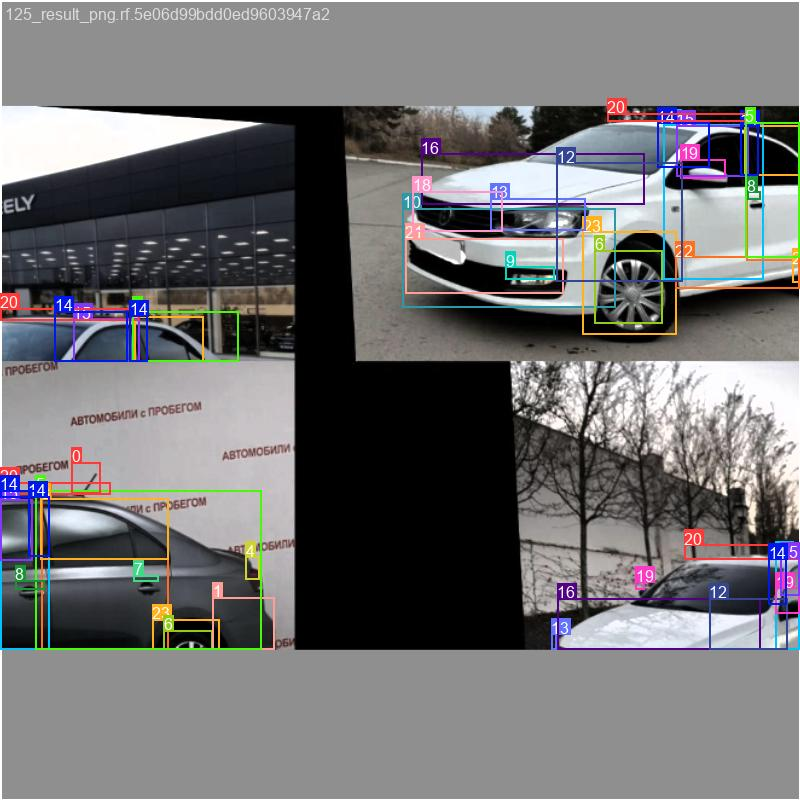

In [ ]:
from IPython.display import Image

HOME = '/content'

# Now you can use HOME in your file paths
file_path = f'{HOME}/runs/detect/train/train_batch47.jpg'
Image(filename=file_path, width=600)


In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    P_curve.png       train_batch2.jpg
confusion_matrix_normalized.png			    PR_curve.png      train_batch45.jpg
confusion_matrix.png				    R_curve.png       train_batch46.jpg
events.out.tfevents.1702813056.1be9575e4655.1107.0  results.csv       train_batch47.jpg
F1_curve.png					    results.png       val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					    train_batch1.jpg  weights


/content


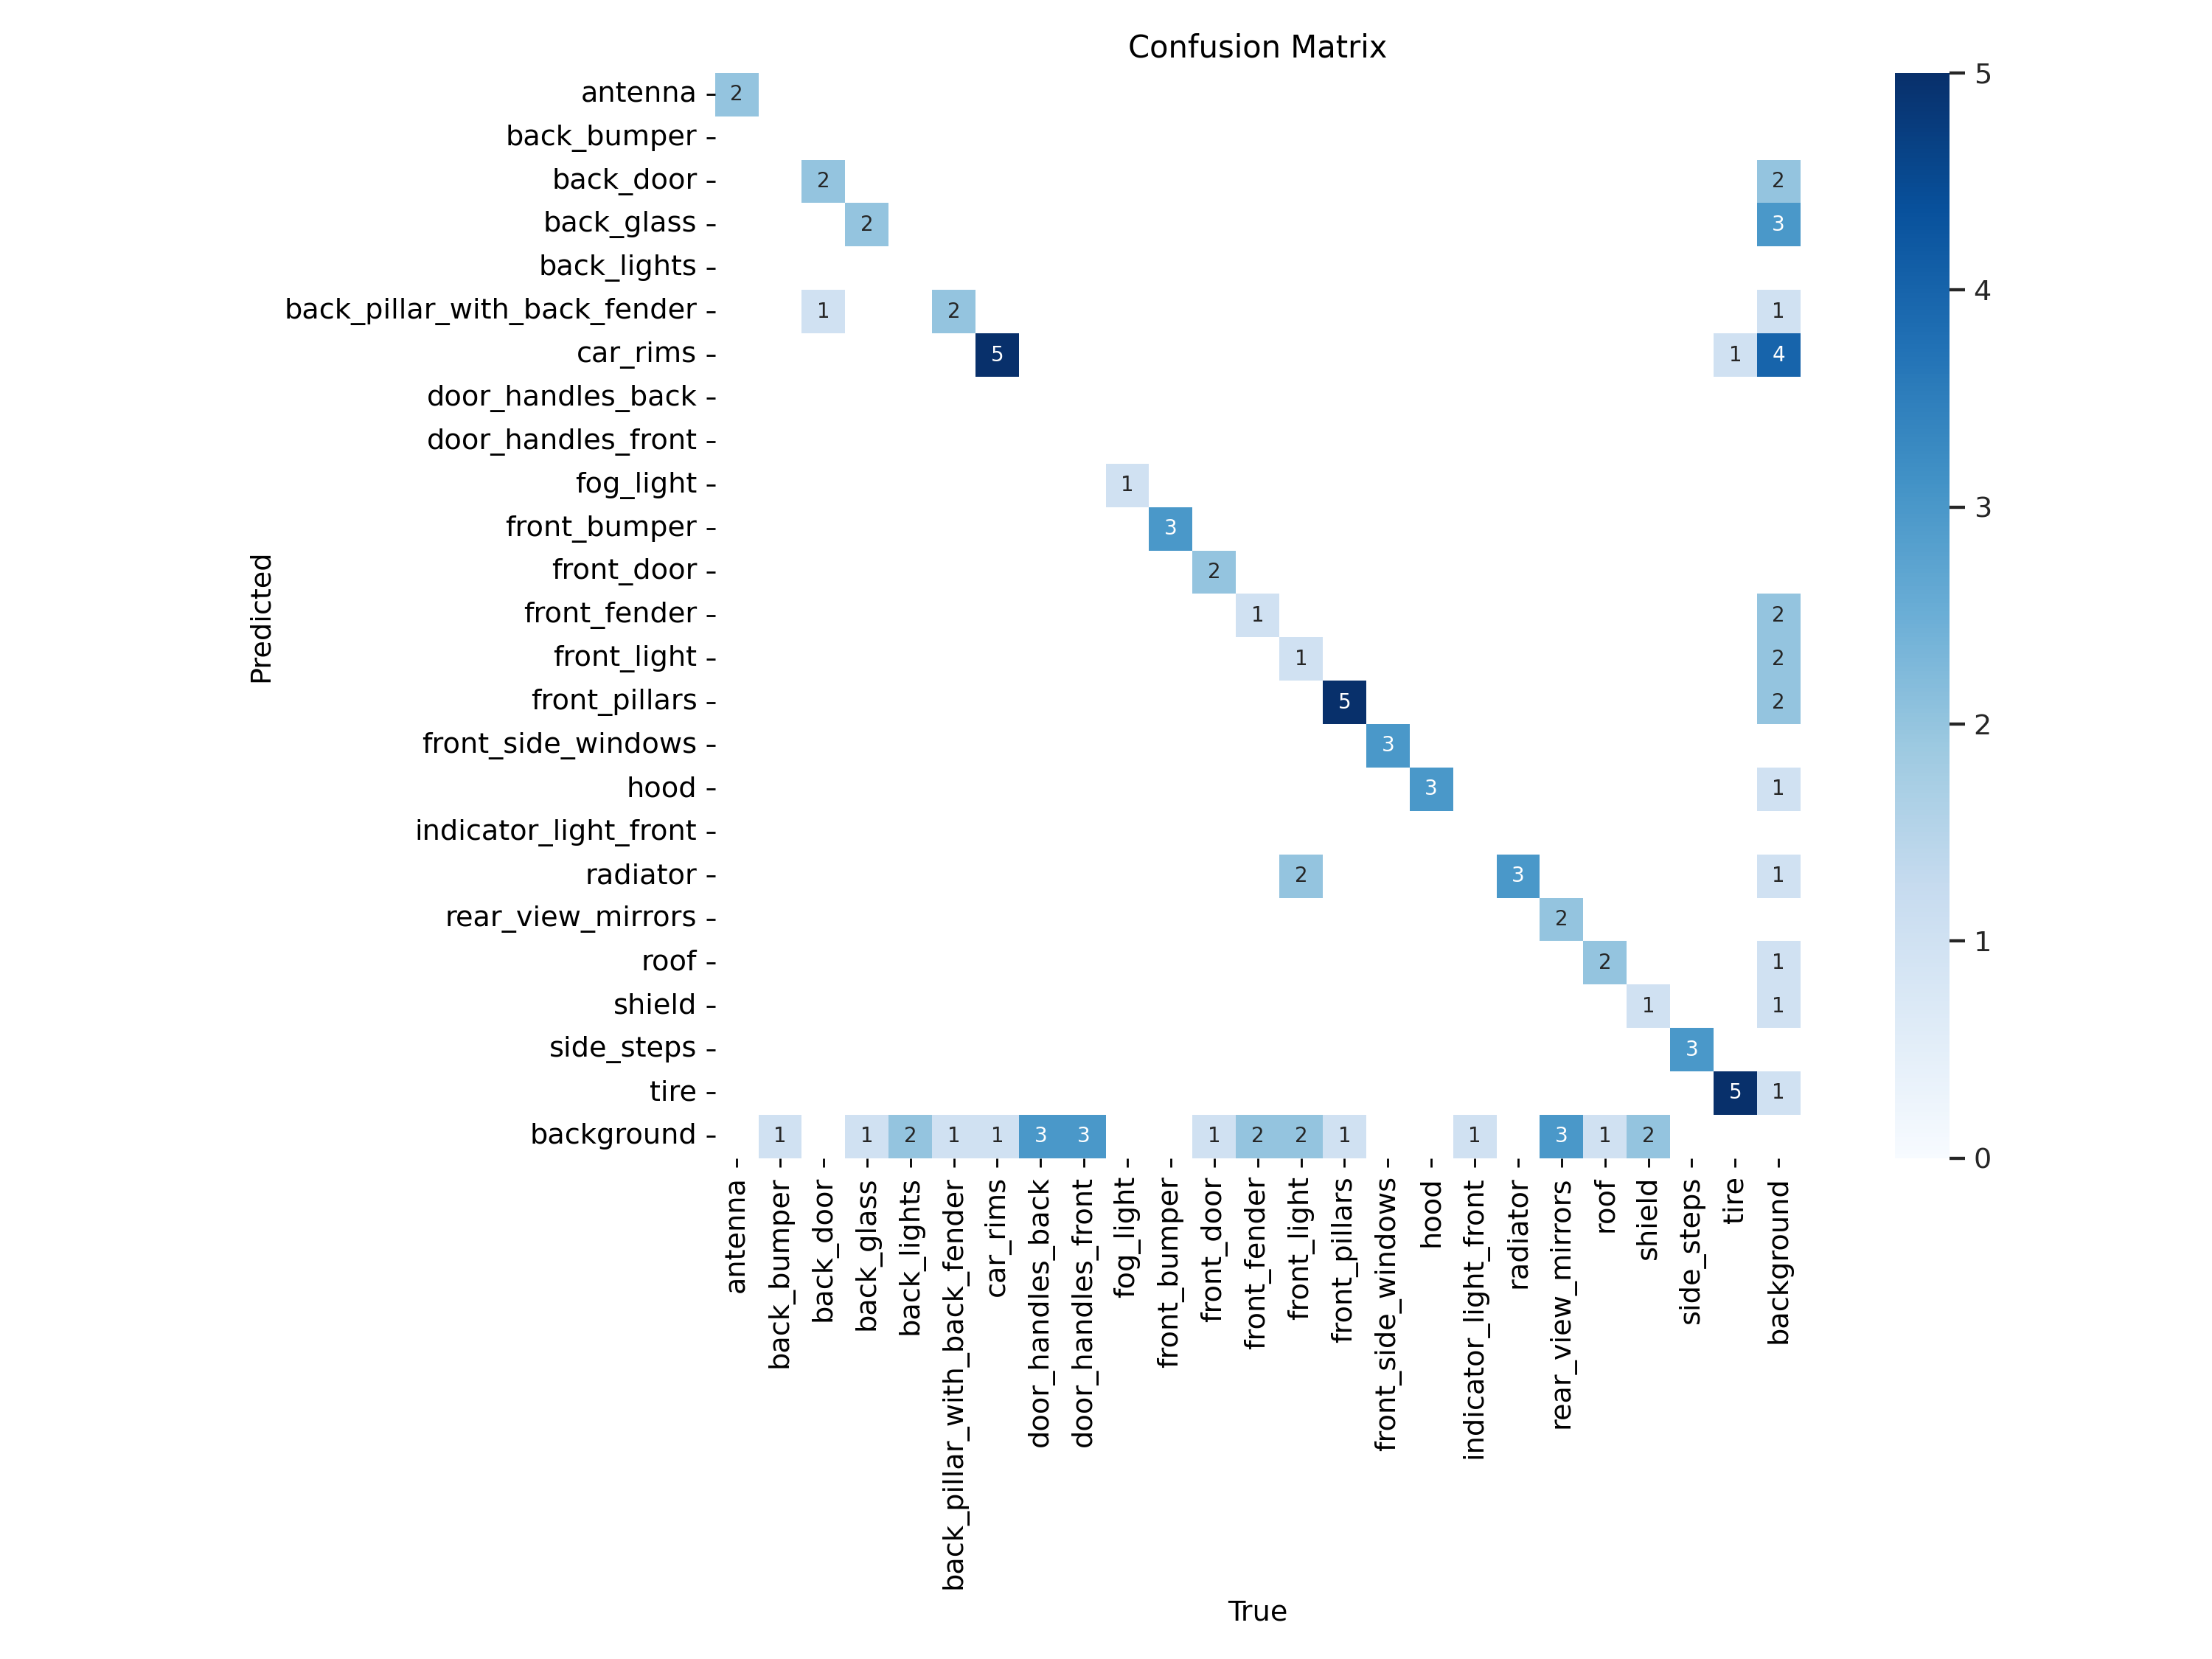

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=800)

/content


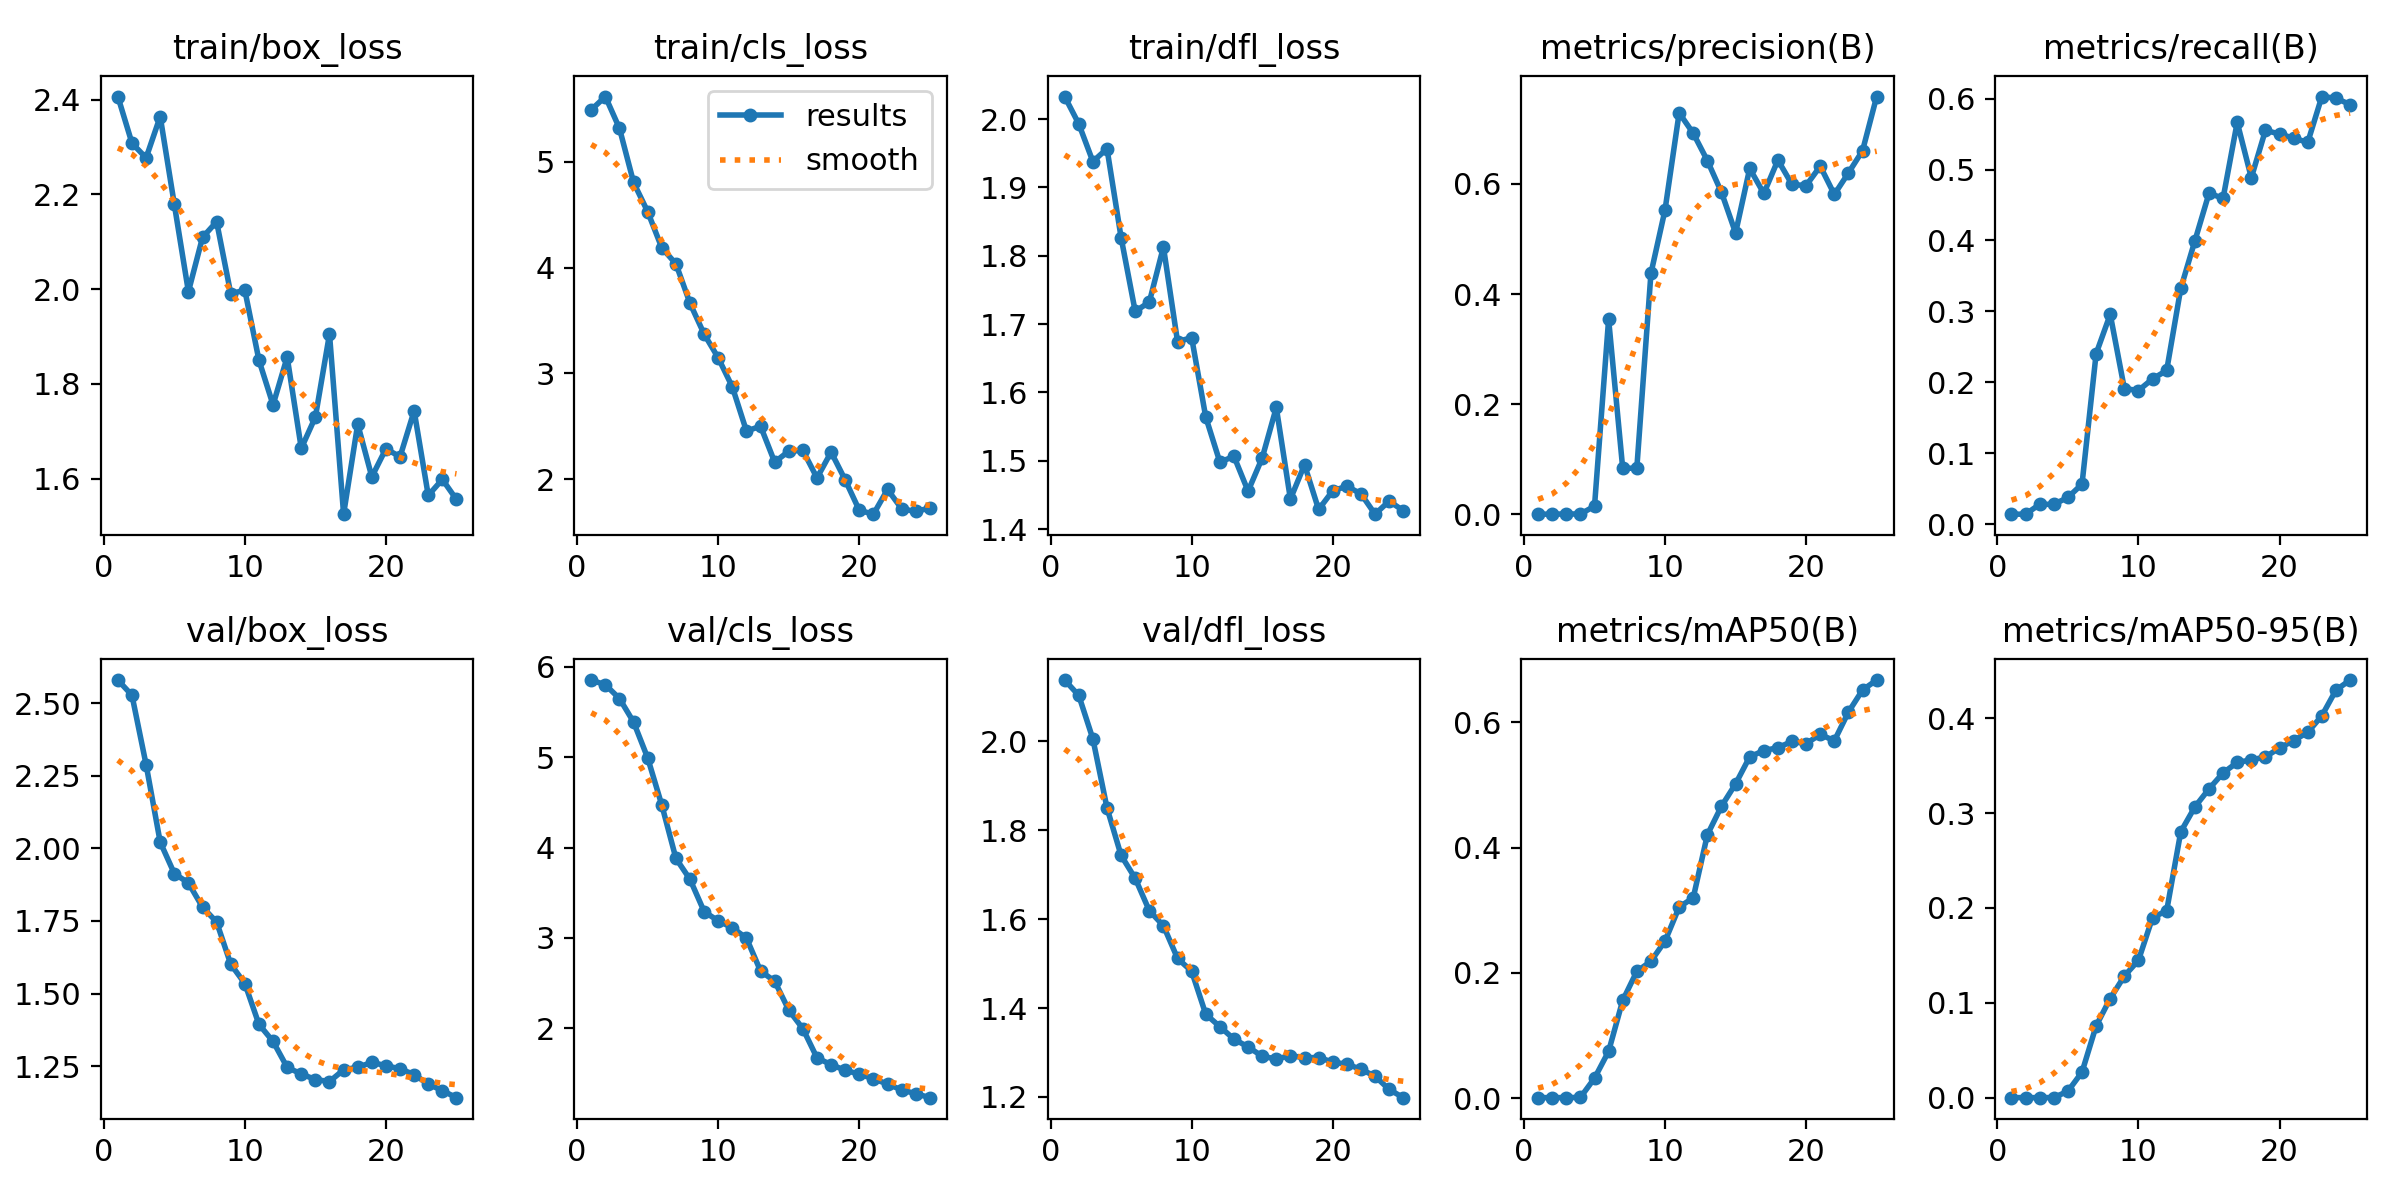

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=800)

/content


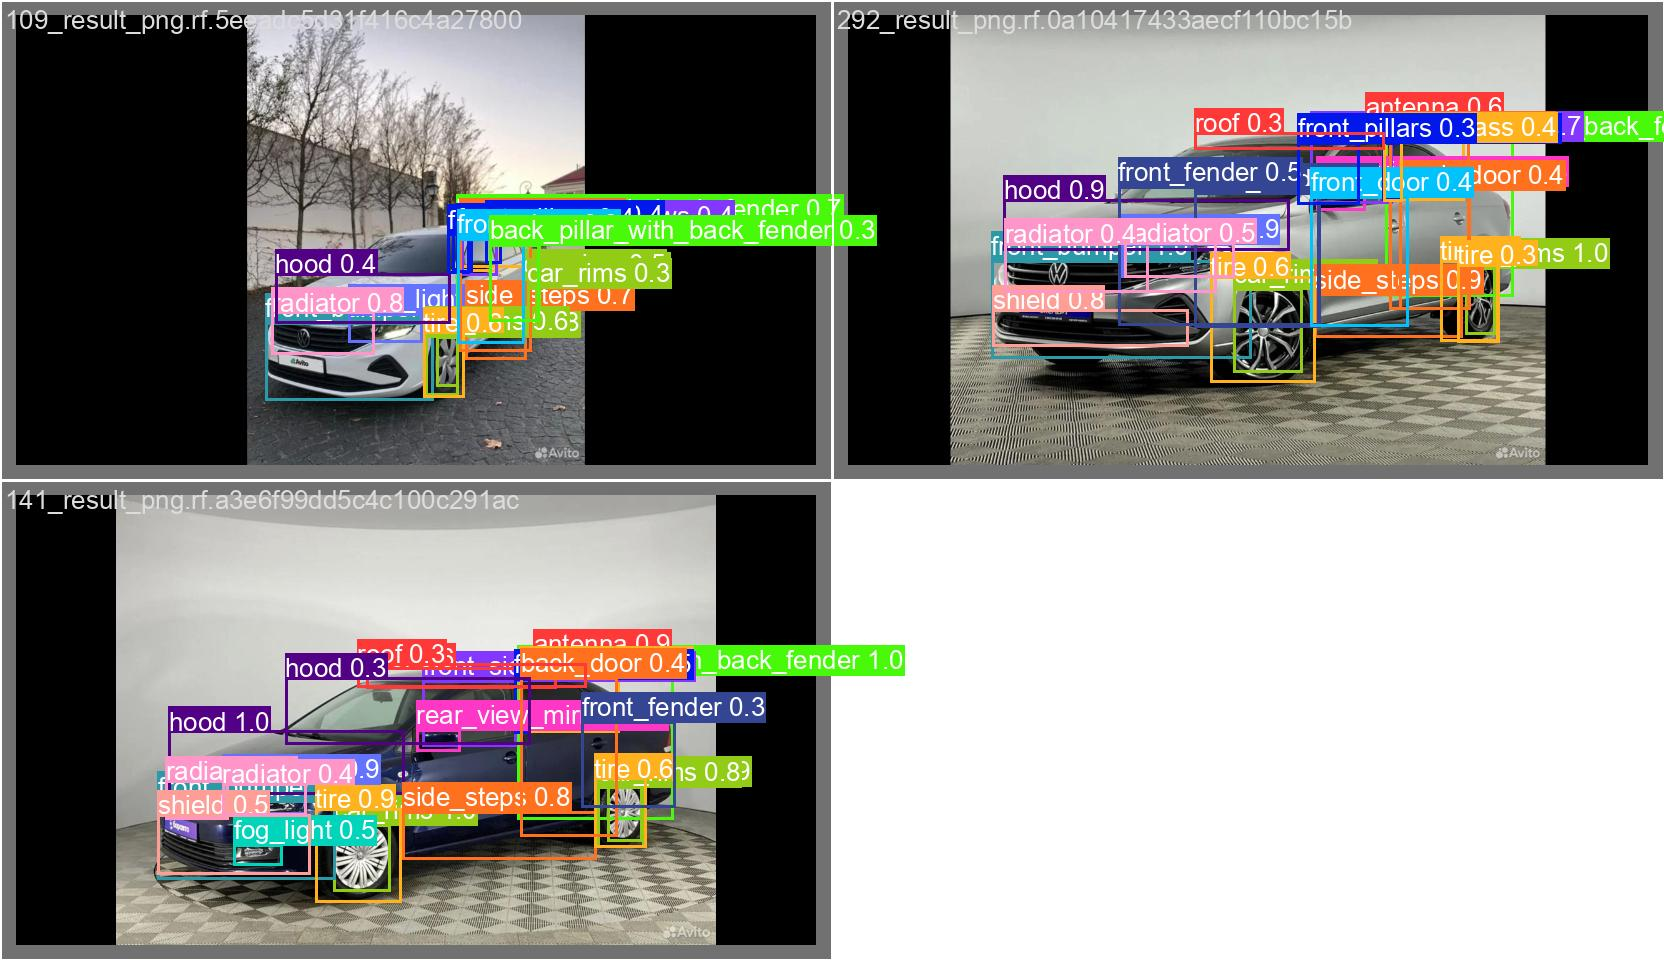

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=1000)

# Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11134872 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/Car-Parts-Segmentation-2/valid/labels.cache... 3 images, 0 backgrounds, 0 corrupt: 100% 3/3 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.30it/s]
                   all          3         77      0.758      0.591      0.668      0.439
               antenna          3          2      0.866          1      0.995      0.605
           back_bumper          3          1          1          0          0          0
             back_door          3          3      0.496      0.667      0.645      0.387
            back_glass          3          3       0.41      0.667      0.712      0.533
           back_lights          3          2          1          0          0          0
back_pillar_with_back_fender    

# Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11134872 parameters, 0 gradients, 28.5 GFLOPs

image 1/1 /content/Car-Parts-Segmentation-2/test/images/123_result_png.rf.b759147235cd33ed7c94a70e085a8400.jpg: 480x800 2 back_doors, 1 back_glass, 1 back_pillar_with_back_fender, 3 car_rimss, 3 fog_lights, 1 front_bumper, 1 front_door, 1 front_fender, 1 front_light, 3 front_pillarss, 1 front_side_windows, 1 hood, 2 radiators, 1 rear_view_mirrors, 2 shields, 1 side_steps, 2 tires, 106.4ms
Speed: 4.7ms preprocess, 106.4ms inference, 496.2ms postprocess per image at shape (1, 3, 480, 800)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


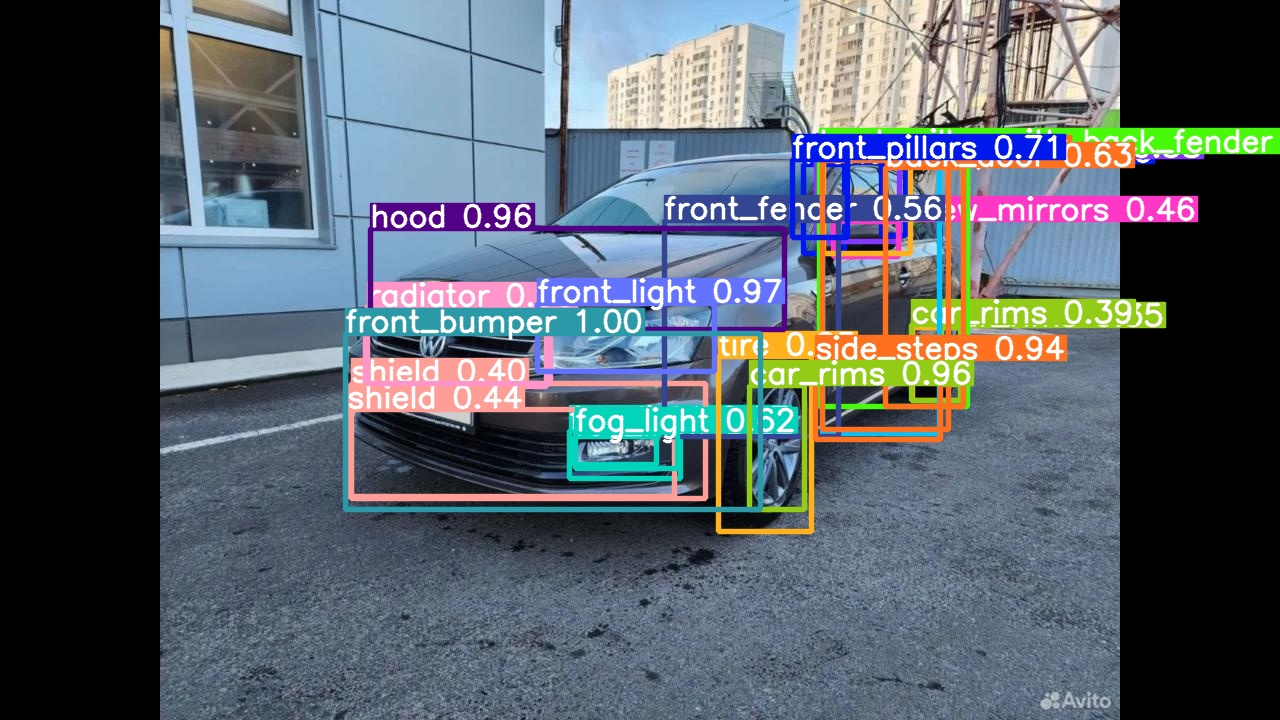

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/123_result_png.rf.b759147235cd33ed7c94a70e085a8400.jpg')[:3]:
      display(Image(filename=image_path, width=800))
      print("\n")

# DEPLOEMENT

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/1
Share your model with the world at: https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/1


In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

** Deploy Your Model to the Edge**

In addition to using the Roboflow hosted API for deployment, you can use [Roboflow Inference](https://inference.roboflow.com), an open source inference solution that has powered millions of API calls in production environments. Inference works with CPU and GPU, giving you immediate access to a range of devices, from the NVIDIA Jetson to TRT-compatible devices to ARM CPU devices.

With Roboflow Inference, you can self-host and deploy your model on-device. You can deploy applications using the [Inference Docker containers](https://inference.roboflow.com/quickstart/docker/) or the pip package.

For example, to install Inference on a device with an NVIDIA GPU, we can use:

```
docker pull roboflow/roboflow-inference-server-gpu
```

Then we can run inference via HTTP:

```python
import requests

workspace_id = ""
model_id = ""
image_url = ""
confidence = 0.75
api_key = ""

infer_payload = {
    "image": {
        "type": "url",
        "value": image_url,
    },
    "confidence": confidence,
    "iou_threshold": iou_thresh,
    "api_key": api_key,
}
res = requests.post(
    f"http://localhost:9001/{workspace_id}/{model_id}",
    json=infer_object_detection_payload,
)

predictions = res.json()
```

Above, set your Roboflow workspace ID, model ID, and API key.

- [Find your workspace and model ID](https://docs.roboflow.com/api-reference/workspace-and-project-ids?ref=blog.roboflow.com)
- [Find your API key](https://docs.roboflow.com/api-reference/authentication?ref=blog.roboflow.com#retrieve-an-api-key)

Also, set the URL of an image on which you want to run inference. This can be a local file.

_To use your YOLOv5 model commercially with Inference, you will need a Roboflow Enterprise license, through which you gain a pass-through license for using YOLOv5. An enterprise license also grants you access to features like advanced device management, multi-model containers, auto-batch inference, and more._

https://inference.roboflow.com/quickstart/docker/